In [1]:
import pandas as pd
import numpy as np

# PROBLEM STATEMENT
To find if it rains or not based on the features
# DATA GATHERING

In [7]:
df = pd.read_csv('Rainfall.csv')

In [9]:
df

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7
...,...,...,...,...,...,...,...,...,...,...,...,...
361,27,1022.7,18.8,17.7,16.9,15.0,84,90,yes,0.0,30.0,18.4
362,28,1026.6,18.6,17.3,16.3,12.8,75,85,yes,1.0,20.0,25.9
363,29,1025.9,18.9,17.7,16.4,13.3,75,78,yes,4.6,70.0,33.4
364,30,1025.3,19.2,17.3,15.2,13.3,78,86,yes,1.2,20.0,20.9


# EDA

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     366 non-null    int64  
 1   pressure                366 non-null    float64
 2   maxtemp                 366 non-null    float64
 3   temparature             366 non-null    float64
 4   mintemp                 366 non-null    float64
 5   dewpoint                366 non-null    float64
 6   humidity                366 non-null    int64  
 7   cloud                   366 non-null    int64  
 8   rainfall                366 non-null    object 
 9   sunshine                366 non-null    float64
 10           winddirection  365 non-null    float64
 11  windspeed               365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [17]:
df.isnull().sum()

day                       0
pressure                  0
maxtemp                   0
temparature               0
mintemp                   0
dewpoint                  0
humidity                  0
cloud                     0
rainfall                  0
sunshine                  0
         winddirection    1
windspeed                 1
dtype: int64

In [19]:
df.columns

Index(['day', 'pressure ', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity ', 'cloud ', 'rainfall', 'sunshine', '         winddirection',
       'windspeed'],
      dtype='object')

In [147]:
df['winddirection'].fillna(df['winddirection'].mean(), inplace=True)

In [151]:
df['windspeed'].fillna(df['windspeed'].mean(), inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_17480\3492531869.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['windspeed'].fillna(df['windspeed'].mean(), inplace=True)


In [153]:
df.isnull().sum()

day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    0
windspeed        0
dtype: int64

In [155]:
df.rename(str.strip, axis = 'columns', inplace = True)

In [157]:
df.columns

Index(['day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity', 'cloud', 'rainfall', 'sunshine', 'winddirection',
       'windspeed'],
      dtype='object')

In [159]:
df['rainfall'].value_counts()


rainfall
1    249
0    117
Name: count, dtype: int64

In [161]:
df['rainfall'].value_counts().index

Index([1, 0], dtype='int32', name='rainfall')

In [43]:
import matplotlib.pyplot as plt

In [45]:
df['rainfall'].value_counts().values

array([249, 117], dtype=int64)

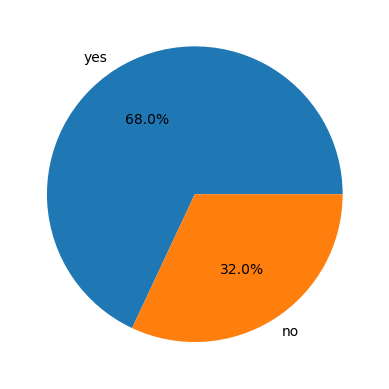

In [60]:
plt.pie(df['rainfall'].value_counts().values, labels = df['rainfall'].value_counts().index, autopct = '%1.1f%%')
plt.show()

In [62]:
df.groupby('rainfall').mean()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
rainfall,,,,,,,,,,,
no,15.623932,1014.576923,27.070940,24.053846,21.957265,18.766667,73.000000,51.256410,7.586325,103.076923,19.275214
yes,15.819277,1013.350602,25.777912,23.603213,21.865060,20.563454,83.550201,80.465863,2.931325,100.766129,22.604032


In [68]:
from sklearn.preprocessing import LabelEncoder

In [70]:
label =  LabelEncoder()

In [163]:
df['rainfall'] = label.fit_transform(df['rainfall'])

In [74]:
df

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,1,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,1,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,1,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,1,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,1,0.0,40.0,13.7
...,...,...,...,...,...,...,...,...,...,...,...,...
361,27,1022.7,18.8,17.7,16.9,15.0,84,90,1,0.0,30.0,18.4
362,28,1026.6,18.6,17.3,16.3,12.8,75,85,1,1.0,20.0,25.9
363,29,1025.9,18.9,17.7,16.4,13.3,75,78,1,4.6,70.0,33.4
364,30,1025.3,19.2,17.3,15.2,13.3,78,86,1,1.2,20.0,20.9


In [165]:
corr = df.corr()

In [90]:
import seaborn as sns

In [171]:
from sklearn.model_selection import train_test_split
x = df.drop(['rainfall', 'day'], axis = 1)
y = df['rainfall']


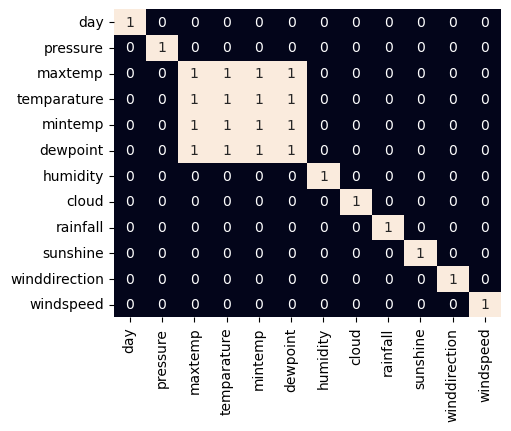

In [173]:
plt.figure(figsize=(5,4))
sns.heatmap(df.corr() > 0.8,
           annot=True,
           cbar=False)
plt.show()

In [175]:
x =  x.drop(['mintemp', 'maxtemp'], axis = 1)

In [177]:
x

,pressure,temparature,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,1025.9,18.3,13.1,72,49,9.3,80.0,26.3
1,1022.0,18.9,15.6,81,83,0.6,50.0,15.3
2,1019.7,19.3,18.4,95,91,0.0,40.0,14.2
3,1018.9,20.6,18.8,90,88,1.0,50.0,16.9
4,1015.9,20.7,19.9,95,81,0.0,40.0,13.7
...,...,...,...,...,...,...,...,...
361,1022.7,17.7,15.0,84,90,0.0,30.0,18.4
362,1026.6,17.3,12.8,75,85,1.0,20.0,25.9
363,1025.9,17.7,13.3,75,78,4.6,70.0,33.4
364,1025.3,17.3,13.3,78,86,1.2,20.0,20.9


In [179]:
y

0      1
1      1
2      1
3      1
4      1
      ..
361    1
362    1
363    1
364    1
365    0
Name: rainfall, Length: 366, dtype: int64

In [181]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 23)

In [183]:
from sklearn.linear_model import LogisticRegression
Log = LogisticRegression()
Log.fit(x_train, y_train)

C:\Users\admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [207]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, classification_report
def rain_pred(Log, x, y):
    y_pre = Log.predict(x)

    A = accuracy_score(y, y_pre)
    print(A)
rain_pred(Log, x_train, y_train)

0.8013698630136986
